In [9]:
import numpy as np

np.random.seed(19)

# 1


In [ ]:
def power_method(A, p=2, epsilon=1e-8, max_iter=1000):

    n = A.shape[0]

    while True:
        # Generate a random 3x1 vector
        z = np.random.uniform(0.0, 1.0, n)

        # Calculate the product of A and z
        w = np.dot(A, z)

        # Calculate error
        lambda_ = np.max(np.abs(w))
        error = np.linalg.norm(w - lambda_ * z, ord=p)

        if (
            error >= epsilon
        ):  # z is ok -> don't start froma vector that meets the stop condition
            break

    for i in range(max_iter):
        w = np.dot(A, z)
        lambda_ = np.max(np.abs(w))
        z = w / lambda_

        error = np.linalg.norm(A @ z - lambda_ * z, ord=p)

        if error < epsilon:
            break

    return lambda_, z, i + i, error  # type: ignore

In [12]:
# Generate a random 3x3 matrix
np.random.seed(19)
A = np.random.randint(0, 10, (3, 3))

print("Matrix A:")
print(A)

lambda_max, eigenvector, iterations, final_error = power_method(A)

print("Największa wartość własna:", lambda_max)
print("Odpowiadający wektor własny:", eigenvector)
print("Liczba iteracji:", iterations)
print("Końcowy błąd:", final_error)

Matrix A:
[[5 2 8]
 [3 4 2]
 [8 6 2]]
Największa wartość własna: 13.62590694760338
Odpowiadający wektor własny: [1.         0.50923604 0.95092936]
Liczba iteracji: 40
Końcowy błąd: 6.578052208635384e-09


In [4]:
np.dot(A, eigenvector)

array([13.62590694,  6.93880287, 12.95727495])

In [5]:
lambda_max * eigenvector

array([13.62590695,  6.93880287, 12.95727495])

# 2


In [ ]:
AAT = np.dot(A, A.T)
B = AAT.copy()

eigenvalues = []
eigenvectors = []

# Calculate eigenvalues and eigenvectors of AAT
for i in range(3):
    lambda_, eigenvector_, _, _ = power_method(B)
    eigenvalues.append(lambda_)
    eigenvectors.append(eigenvector_)

    # deflate
    B = B - lambda_ * np.outer(eigenvector_, eigenvector_) / np.dot(
        eigenvector_, eigenvector_
    )

# Normalize eigenvectors
for i in range(len(eigenvectors)):
    eigenvectors[i] = eigenvectors[i] / np.linalg.norm(eigenvectors[i])

# Matrix U — wektory własne
U = np.column_stack(eigenvectors)

# Matrix D - pierwiastki z wartości własnych
D_vals = np.sqrt(np.array(eigenvalues))
D = np.diag(D_vals)

# Inverse D
D_inv = np.diag([1 / d if d > 1e-12 else 0 for d in D_vals])

V = A.T @ U @ D_inv

A_reconstructed = U @ D @ V.T

print("Macierz A:")
print(A)
print("\nMacierz U:")
print(U)
print("\nMacierz D:")
print(D)
print("\nMacierz V:")
print(V)
print("\nOdtworzona macierz A:")
print(A_reconstructed)

Macierz A:
[[5 2 8]
 [3 4 2]
 [8 6 2]]

Macierz U:
[[ 0.61918806  0.78051443 -0.0860428 ]
 [ 0.3685361  -0.19209505  0.90954969]
 [ 0.69338827 -0.59489218 -0.40659071]]

Macierz D:
[[13.86943642  0.          0.        ]
 [ 0.          5.61901815  0.        ]
 [ 0.          0.          1.437139  ]]

Macierz V:
[[ 0.70288759 -0.25500014 -0.66402106]
 [ 0.49553925 -0.49416185  0.7143143 ]
 [ 0.51028412  0.83113115  0.22097765]]

Odtworzona macierz A:
[[5. 2. 8.]
 [3. 4. 2.]
 [8. 6. 2.]]


In [2]:
def macierz_odwrotna(A):

    n = A.shape[0]

    if A.shape[0] != A.shape[1]:
        raise ValueError("Macierz musi być kwadratowa")

    rozszerzona = np.hstack((A, np.identity(n)))

    for i in range(n):

        if rozszerzona[i, i] == 0:
            for j in range(i + 1, n):
                if rozszerzona[j, i] != 0:
                    rozszerzona[[i, j]] = rozszerzona[[j, i]]
                    break
            else:
                raise ValueError(
                    "Macierz jest osobliwa - nie istnieje macierz odwrotna"
                )

        dzielnik = rozszerzona[i, i]
        rozszerzona[i] = rozszerzona[i] / dzielnik

        for j in range(n):
            if j != i and rozszerzona[j, i] != 0:
                czynnik = rozszerzona[j, i]
                rozszerzona[j] = rozszerzona[j] - czynnik * rozszerzona[i]

    A_odwrotna = rozszerzona[:, n:]

    return A_odwrotna

In [3]:
def wartosci_wlasne(M):
    return np.linalg.eig(M).eigenvalues

In [4]:
def norma_macierzowaA2(M):
    return max(np.abs(wartosci_wlasne(M)))

In [5]:
def norma_macierzowaAinf(M):
    return max(np.sum(np.abs((M)), axis=1))

In [6]:
def norma_macierzowaA1(A):
    sum_col = np.zeros(A.shape[1])
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            sum_col[j] += abs(A[i, j])
    return max(sum_col)

In [40]:
def matrix_norm_p(A, p):
    result = 0

    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            result += abs(A[i, j]) ** p
    return result ** (1 / p)

In [13]:
print(A)

[[5 2 8]
 [3 4 2]
 [8 6 2]]


In [14]:
import matplotlib.pyplot as plt

In [17]:
epsilon = 0.0001
vectors = [
    np.random.uniform(0.0, 1.0, 3),
    np.random.uniform(0.0, 1.0, 3),
    np.random.uniform(0.0, 1.0, 3),
]
iterations = 1000

In [19]:
values = [1, 2, 3, 4, np.inf]

In [18]:
vectors

[array([0.18151791, 0.52310778, 0.64263515]),
 array([0.5593644 , 0.61109228, 0.70377718]),
 array([0.14339506, 0.97453851, 0.33250533])]

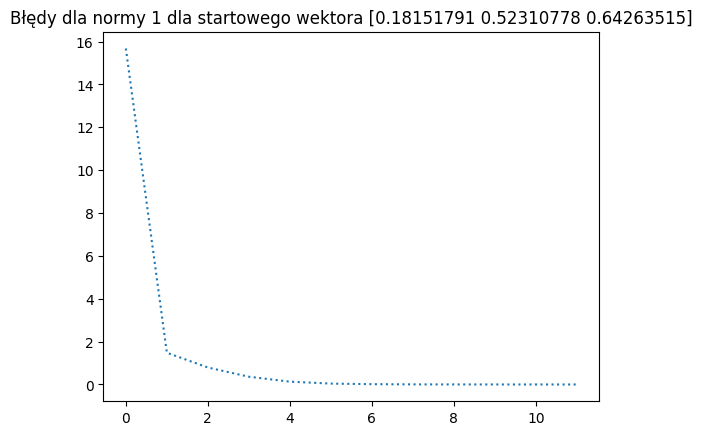

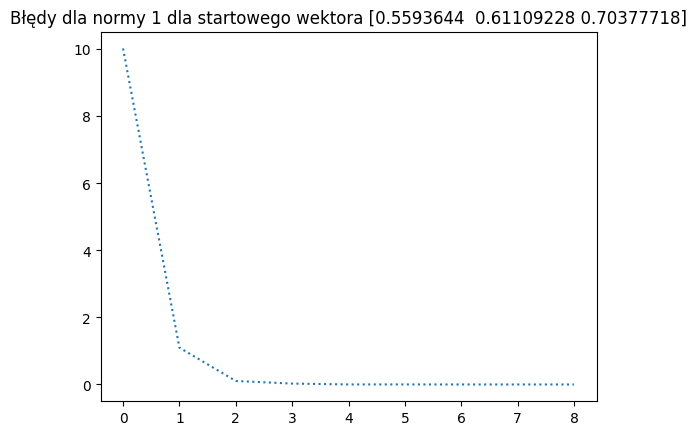

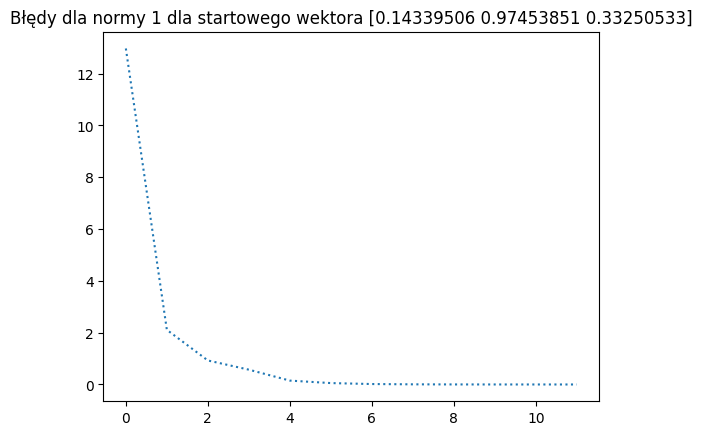

In [57]:
for vector in vectors:
    errors = []

    z = vector

    for i in range(iterations):
        w = np.dot(A, z)
        lambda_ = np.max(np.abs(w))
        z = w / lambda_

        error = np.linalg.norm(A @ z - lambda_ * z, ord=1)
        errors.append(error)
        if error < epsilon:
            break

    plt.title(f"Błędy dla normy 1 dla startowego wektora {vector}")
    plt.plot(errors, linestyle="dotted")
    plt.show()

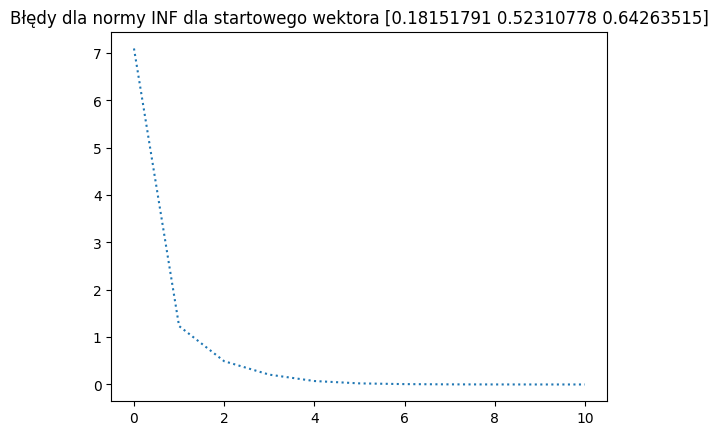

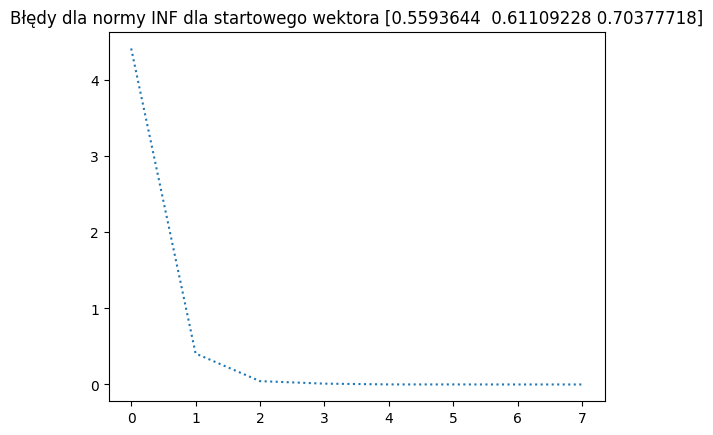

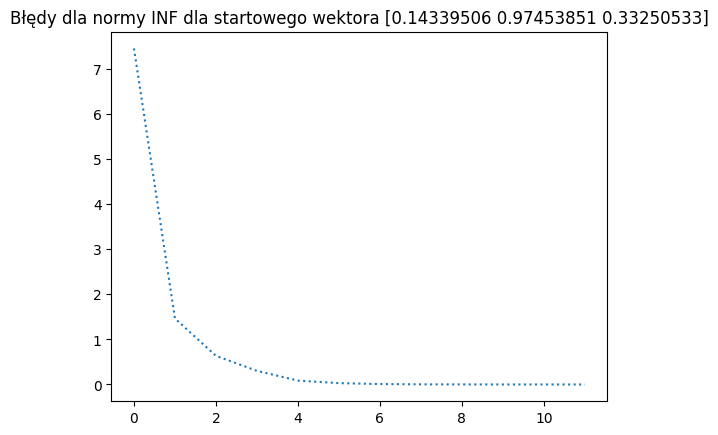

In [56]:
for vector in vectors:
    errors = []

    z = vector

    for i in range(iterations):
        w = np.dot(A, z)
        lambda_ = np.max(np.abs(w))
        z = w / lambda_

        error = np.linalg.norm(A @ z - lambda_ * z, ord=np.inf)
        errors.append(error)
        if error < epsilon:
            break

    plt.title(f"Błędy dla normy INF dla startowego wektora {vector}")
    plt.plot(errors, linestyle="dotted")
    plt.show()

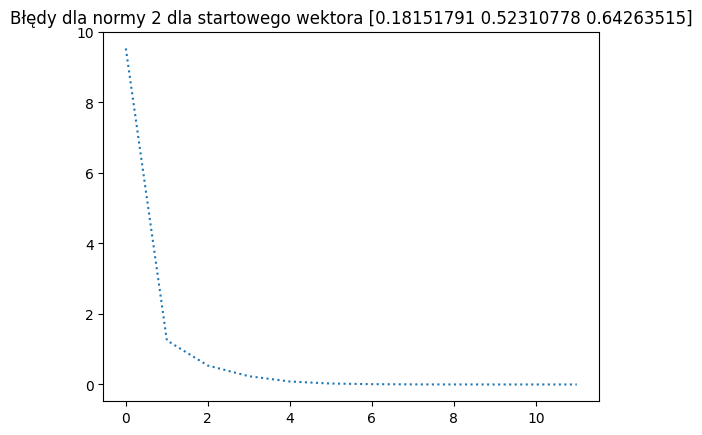

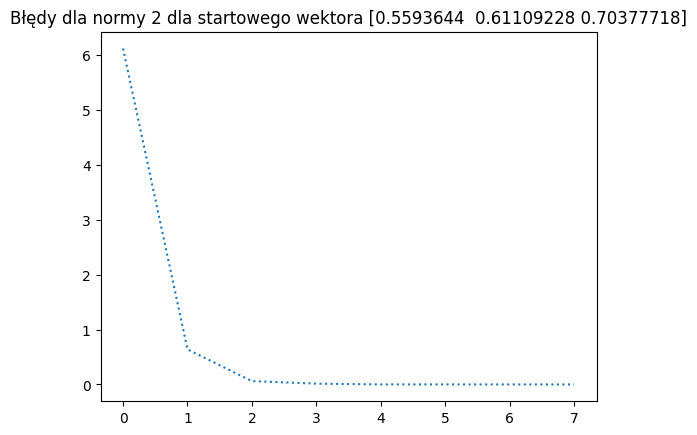

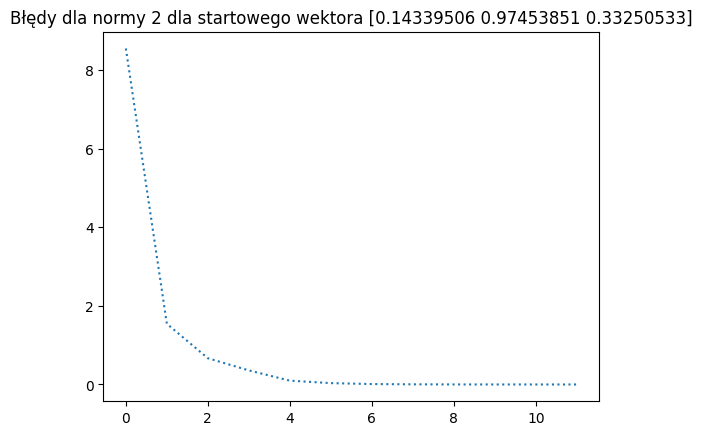

In [55]:
for vector in vectors:
    errors = []

    z = vector

    for i in range(iterations):
        w = np.dot(A, z)
        lambda_ = np.max(np.abs(w))
        z = w / lambda_

        error = np.linalg.norm(A @ z - lambda_ * z, ord=2)
        errors.append(error)
        if error < epsilon:
            break

    plt.title(f"Błędy dla normy 2 dla startowego wektora {vector}")
    plt.plot(errors, linestyle="dotted")
    plt.show()

In [49]:
def matrix_norm_p(A, p):
    result = 0

    for i in range(A.shape[0]):
        result += abs(A[i]) ** p
    return result ** (1 / p)

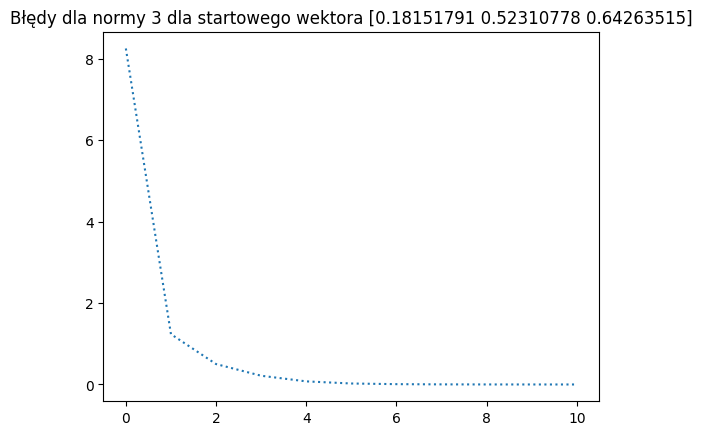

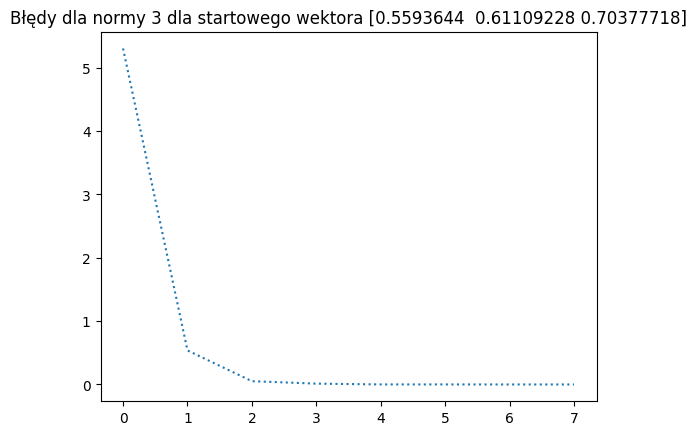

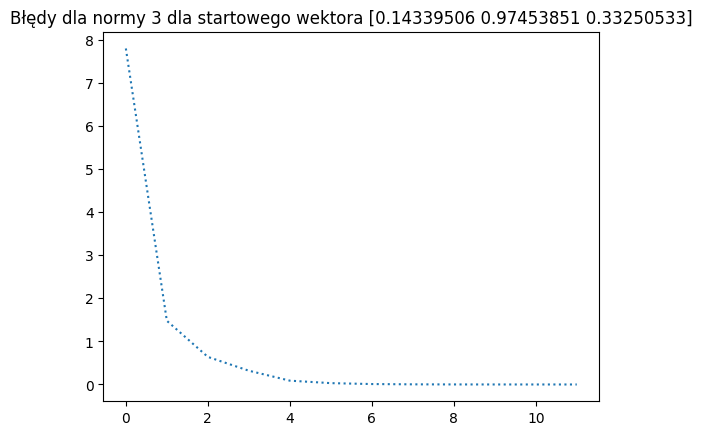

In [54]:
for vector in vectors:
    errors = []

    z = vector

    for i in range(iterations):
        w = np.dot(A, z)
        lambda_ = np.max(np.abs(w))
        z = w / lambda_

        error = matrix_norm_p(A @ z - lambda_ * z, 3)
        errors.append(error)
        if error < epsilon:
            break

    plt.title(f"Błędy dla normy 3 dla startowego wektora {vector}")
    plt.plot(errors, linestyle="dotted")
    plt.show()

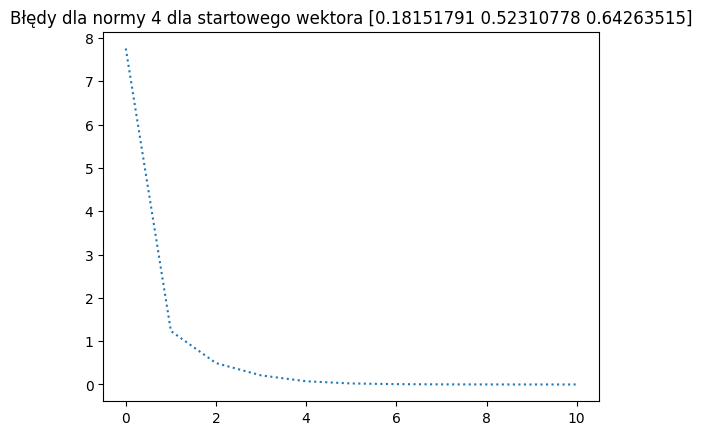

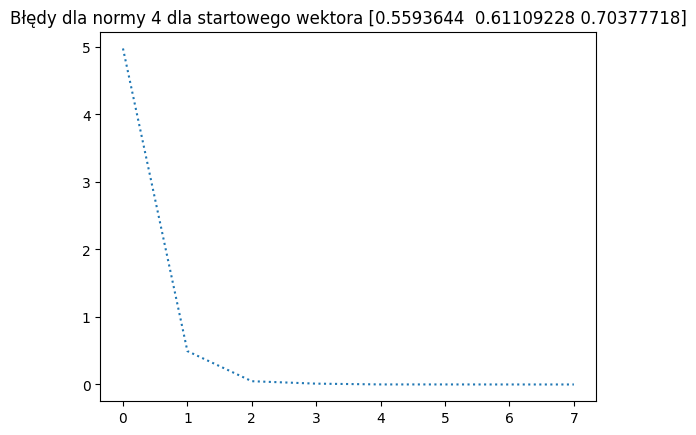

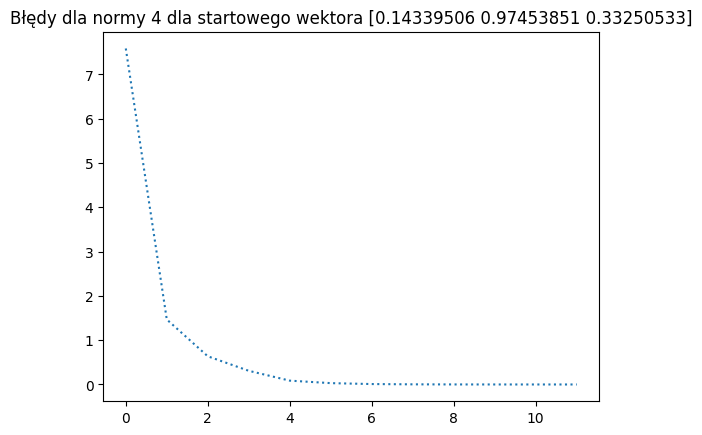

In [53]:
for vector in vectors:
    errors = []

    z = vector

    for i in range(iterations):
        w = np.dot(A, z)
        lambda_ = np.max(np.abs(w))
        z = w / lambda_

        error = matrix_norm_p(A @ z - lambda_ * z, 4)
        errors.append(error)
        if error < epsilon:
            break

    plt.title(f"Błędy dla normy 4 dla startowego wektora {vector}")
    plt.plot(errors, linestyle="dotted")
    plt.show()

In [61]:
U, D, Vt = np.linalg.svd(A)

# Zrekonstruuj macierz A jako U @ diag(D) @ Vt
A_reconstructed = U @ np.diag(D) @ Vt

# Oblicz normy różnicy ||A - A_reconstructed||_p

norm_2 = np.linalg.norm(A - A_reconstructed, 2)
norm_1 = np.linalg.norm(A - A_reconstructed, 1)
norm_inf = np.linalg.norm(A - A_reconstructed, np.inf)

print("Oryginalna macierz A:")
print(A)
print("\nZrekonstruowana macierz U @ diag(D) @ Vt:")
print(A_reconstructed)
print("\nNormy różnicy ||A - UDVt||_p:")

print(f"Norma spektralna (2): {norm_2}")
print(f"Norma kolumnowa (1): {norm_1}")
print(f"Norma nieskonczona (1): {norm_inf}")

Oryginalna macierz A:
[[5 2 8]
 [3 4 2]
 [8 6 2]]

Zrekonstruowana macierz U @ diag(D) @ Vt:
[[5. 2. 8.]
 [3. 4. 2.]
 [8. 6. 2.]]

Normy różnicy ||A - UDVt||_p:
Norma spektralna (2): 1.0253185603527865e-14
Norma kolumnowa (1): 1.199040866595169e-14
Norma nieskonczona (1): 1.3322676295501878e-14
